# Linear Regression using Numpy

## Linear Regression with One Variable

In [1]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read Data from Dataset

In [2]:
# Read data from dataset
data = pd.read_csv('data/ex1data1.txt', names = ["Population", "Food Truck Profit"])
x = data.iloc[:, 0] # first column
y = data.iloc[:, 1] # second column
m = len(y)

# Show first few examples
print(f"Number of samples: {m}")
data.head()

Number of samples: 97


,Population,Food Truck Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plot Data

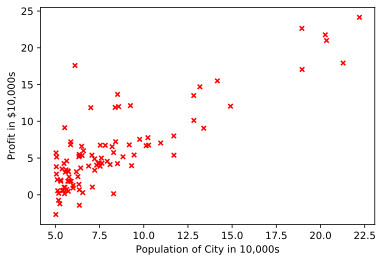

In [3]:
# Plot data
plt.scatter(x, y, marker='x', c = 'r', s = 20)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

### Model

In [4]:
# Change x and y from 1d array to 2d array (column vector)
X = x[:, np.newaxis]
y = y[:, np.newaxis]

# Add intercept term to X
onecol = np.ones((m, 1))
X = np.hstack((onecol, X))
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (97, 2), y shape: (97, 1)


In [5]:
# Set parameters to zero:
theta = np.zeros((2, 1))
print(f"theta shape: {theta.shape}")

theta shape: (2, 1)


$$X = \begin{pmatrix}1 & x^{(1)} \\ \vdots & \vdots \\ 1 & x^{(m)}\end{pmatrix}, \quad
y = \begin{pmatrix}y^{(1)} \\ \vdots \\ y^{(m)}\end{pmatrix}, \quad
\theta = \begin{pmatrix} \theta_0 \\ \theta_1\end{pmatrix}$$

In [6]:
# Define parameters for gradient descent:
## Number of iterations
iterations = 1500
## Learning rate
alpha = 0.01

\begin{align*}
&\text{Hypothesis:} && h_{\theta}(x^{(i)}) = \theta_0 + \theta_1 x^{(i)} \\
&\text{Cost Function:} && J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m}(X \theta - y)^T(X\theta - y)
\end{align*}

In [7]:
# Cost function
def computeCost(X, y, theta):
    """ 
    Computes the cost-function value of the input data
    """
    m = len(y)
    res = X @ theta - y
    return np.sum(res ** 2) / (2*m)

In [8]:
# Compute initial cost (should be about 32.07)
computeCost(X, y, theta)

32.072733877455676

\begin{align*}
\text{Gradient descent update step:} && \theta = \theta - \frac{\alpha}{m} X^T (X \theta - y)
\end{align*}

In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent num_iters times with step size alpha
    """
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - (alpha/m) * X.T @ (X @ theta - y)
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

In [10]:
final_theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

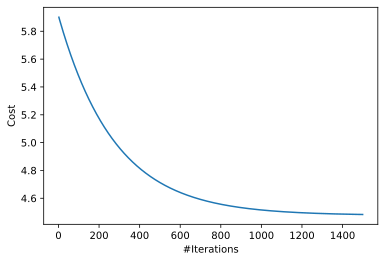

In [11]:
# Plot the progress of the minimization of the cost function through the gradient descent method.
plt.plot(range(2, iterations), J_history[2:])
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

In [12]:
# The cost, using the learned parameters for the linear model is:
computeCost(X, y, final_theta)

4.483388256587726

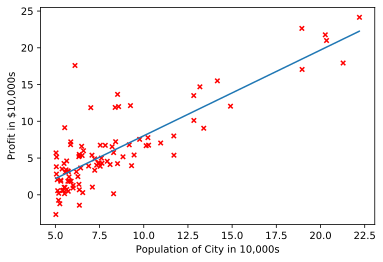

In [13]:
# Finally lets plot the data points vs the linear regression line:
plt.scatter(X[:, 1], y, marker='x', c = 'r', s = 20)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(X[:, 1], X @ final_theta)
plt.show()

## Linear Regression with Multiple Variables

### Read Data from Dataset

In [14]:
data2 = pd.read_csv('data/ex1data2.txt', sep = ",", names = ["Size(sqft)", "Nr. Bedrooms", "Price"])
x2 = data2.iloc[:, 0:2]
y2 = data2.iloc[:, 2]
m2 = len(y2)

print(f"Number of samples: {m2}")
data2.head()

Number of samples: 47


,Size(sqft),Nr. Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [15]:
def featureNormalize(x):
    mu = np.mean(x)
    std = np.std(x)
    return (x - mu)/std, mu, std

In [16]:
# Perform feature normalization:
x2_normalized, mu, std = featureNormalize(x2)

### Model (Iterative)

In [17]:
# Change y from 1d array to 2d array (column vector)
y2 = y2[:, np.newaxis]

# Add intercept term to X
onecol = np.ones((m2, 1))
X2 = np.hstack((onecol, x2_normalized))

theta2 = np.zeros((3,1))

In [18]:
# Define parameters
alpha2 = 0.01
num_iters2 = 400

In [19]:
# To compute cost we can use the already implemented function computeCost:
computeCost(X2, y2, theta2)

65591548106.45744

In [20]:
# We use gradient descent to calculate the optimal parameter vector theta:
final_theta2, J_history2 = gradientDescent(X2, y2, theta2, alpha2, num_iters2)

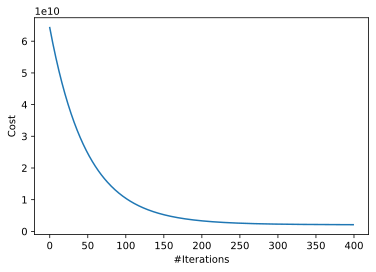

In [21]:
# Plot the progress of the minimization of the cost function through the gradient descent method.
plt.plot(range(num_iters2), J_history2)
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

In [22]:
# Final Theta:
final_theta2

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [23]:
# Final Cost:
computeCost(X2, y2, final_theta2)

2105448288.6292474

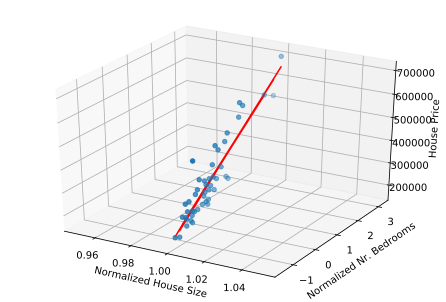

In [24]:
from mpl_toolkits.mplot3d import Axes3D
# Plot features against the linear regression line
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter3D(X2[:, 0], X2[:, 1], y2)
ax.plot3D(X2[:,0], X2[:,1], (X2 @ final_theta2).flatten(), c='r')
ax.set_xlabel('Normalized House Size')
ax.set_ylabel('Normalized Nr. Bedrooms')
ax.set_zlabel('House Price')
plt.show()

In [25]:
# Predict price for a 3 bedroom 1650 sqft house:
price = np.inner(np.array([1, (1650 - mu[0])/std[0], (3 - mu[1])/std[1]]), final_theta2.T)[0]
print(f"Predicted price for a 3 bedroom, 1650 sqft house: {price}$")

Predicted price for a 3 bedroom, 1650 sqft house: 289221.5473712181$


### Model (direct, using Normal Equation)

\begin{align*}
\theta = (X^T X)^{\dagger} X^T y 
\end{align*}

*Note:* For a matrix $A \in \mathbb{R}^{mxn}$, $A^{\dagger} \in \mathbb{R}^{nxm}$ denotes its [Moore-Penrose pseudo-inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse). It is a generalized inverse and provides a least squares solution to a linear equation system
$A x = b$.
It has the following properties: 
* For all $x \in \mathbb{R}^n$ it holds that $\|Ax - b\|_2 \geq \| Az - b \|_2$, where $z = A^{\dagger} b$.
* If $A$ is invertible, then $A^{\dagger} = A^{-1}$.

In [26]:
# Add intercept term to X
X2_intercept = np.hstack((onecol, x2))

# Directly calculate theta
theta_final2_normal = np.linalg.pinv(X2_intercept.T @ X2_intercept) @ X2_intercept.T @ y2

In [27]:
# Predict price for a 3 bedroom 1650 sqft house using the result of the normal equation:
price_normal = np.inner(np.array([1, 1650, 3]), theta_final2_normal.T)[0]
print(f"Predicted price for a 3 bedroom, 1650 sqft house: {price_normal}$")

Predicted price for a 3 bedroom, 1650 sqft house: 293081.4643349717$
